# 🍊 Orange is the new black

Import des librairies

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sqlalchemy import create_engine

# Import data from SQL database 

In [65]:
# database connection
hostname="127.0.0.1"
dbname="openfood"
uname="root"
pwd="pixel"

# create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))

In [66]:
# import SQL table into dataframe
df = pd.read_sql_table('products', engine)

In [67]:
df.shape

(760588, 21)

In [68]:
df.head()

,product_name,quantity,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,brands,origins,ingredients_text,countries,labels,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,additives,vitamin-c_100g,nova_group,pnns_groups_1,pnns_groups_2
0,jeunes pousses,None,NaN,NaN,None,endives,None,None,France,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,unknown,unknown
1,Vitória crackers,None,NaN,NaN,None,None,None,None,France,None,...,7.0,3.08,70.1,15.0,0.56,None,NaN,NaN,unknown,unknown
2,Cacao,130 g,NaN,NaN,None,None,None,None,France,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,unknown,unknown
3,moutarde au moût de raisin,100g,18.0,18.0,d,courte paille,None,eau graines de téguments de moutarde vinaigre ...,France,Delois france,...,8.2,2.20,29.0,22.0,1.84,None,NaN,NaN,Fat and sauces,Dressings and sauces
4,Sfiudwx,dgesc,NaN,NaN,None,Watt,None,None,France,None,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,unknown,unknown


# 🧹 Cleaning notebook

Nous avons commencé le nettoyage dans le notebook SQL :
- Nous avons conservé uniquement les colonnes contenant au moins 60% ou plus de données valides pour notre cible : le jus d'orange<br>
- Nous avons supprimé manuellement quelques colonnes jugées inutiles pour notre analyse (exemple : url de l'image)
- Nous avons converti et gardé uniquement les valeurs dont les données 'countries' sont la France

Dans ce notebook  :
- Nous remplaçons les valeurs NaN par des 0
- Nous isolons notre cible, le jus d'orange dans 'product_name'

Nous avons désormais ainsi un total de 516 lignes et 21 colonnes presque exploitables pour notre analyse.

Text(0.5, 1.0, '% of NaN nans per column')

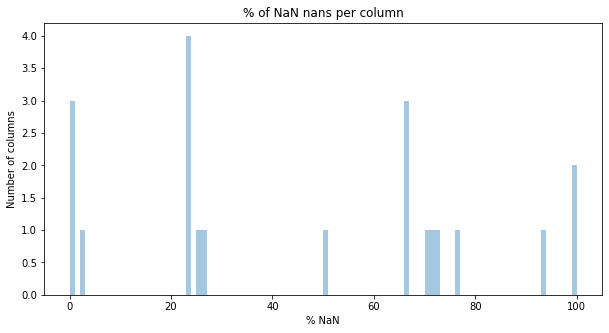

In [70]:
# view the % of NaN

nan_percent = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

plt.figure(figsize=(10,5))
sns.distplot(nan_percent, bins=100, kde=False)
plt.xlabel("% NaN")
plt.ylabel("Number of columns")
plt.title("% of NaN nans per column")

In [71]:
# replace NaN by 0 on entire dataframe
clean_df = df.fillna(0)

In [72]:
# isolate all rows with "product name is "jus" & "orange"
clean_df = df[(df['product_name'].str.contains('jus', na=False)) & (df['product_name'].str.contains('orange', na=False))]

In [73]:
# shape of dataframe
clean_df.shape

(516, 21)

In [74]:
# export CSV
clean_df.to_csv('orangeisthenewblack.csv', index=False)